# Initial Cleaning/ setup procedures


#### _1. Import libraries and set path to pkl file_

In [41]:
import pandas as pd
import os
from datetime import date, timedelta
import datetime
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

ROOT_DIR = os.path.realpath(os.path.join(os.getcwd(), '..'))
pkl_loc = os.path.join(ROOT_DIR, 'data', 'data','weathersmallraw.pkl')
pkl_loc

'C:\\Users\\paull\\OneDrive - Scandinavian Tobacco Group A S\\Documents\\GitHub\\Weatherman\\data\\data\\weathersmallraw.pkl'

### _2. Create dataframe and run basic eda_

In [42]:
df = pd.read_pickle(pkl_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3765246 entries, ('0CNUO', Timestamp('2022-01-01 00:00:00')) to ('ZYITU', Timestamp('2022-09-22 23:00:00'))
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   temp    float64
 1   dwpt    float64
 2   rhum    float64
 3   prcp    float64
 4   snow    float64
 5   wdir    float64
 6   wspd    float64
 7   wpgt    float64
 8   pres    float64
 9   tsun    float64
 10  coco    float64
dtypes: float64(11)
memory usage: 330.7+ MB


In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,3765202.000,3765187.000,3765207.000,3744744.000,0.000,3765167.000,3765177.000,0.000,3765066.000,0.000,1614583.000
mean,9.246,3.645,71.107,0.117,NaN,183.690,13.736,NaN,1015.714,NaN,3.003
std,13.836,13.119,18.703,1.058,NaN,111.916,9.367,NaN,7.961,NaN,2.788
min,-43.000,-52.900,0.000,0.000,NaN,0.000,0.000,NaN,970.300,NaN,1.000
25%,-0.700,-5.700,58.000,0.000,NaN,90.000,7.600,NaN,1011.000,NaN,1.000
50%,12.200,6.200,73.000,0.000,NaN,190.000,13.000,NaN,1015.800,NaN,3.000
75%,20.300,14.800,86.000,0.000,NaN,280.000,18.400,NaN,1020.200,NaN,3.000
max,60.000,60.000,100.000,332.000,NaN,360.000,189.000,NaN,1058.700,NaN,25.000


In [44]:
df

temp    dwpt   rhum  prcp  snow    wdir   wspd  \
station time                                                                    
0CNUO   2022-01-01 00:00:00 -25.100 -28.100 76.000 0.000   NaN 271.000 12.600   
        2022-01-01 01:00:00 -25.700 -28.700 76.000 0.000   NaN 275.000 13.000   
        2022-01-01 02:00:00 -26.200 -29.300 75.000 0.000   NaN 273.000 12.600   
        2022-01-01 03:00:00 -26.100 -29.100 76.000 0.000   NaN 277.000 13.700   
        2022-01-01 04:00:00 -26.500 -29.600 75.000 0.000   NaN 275.000 13.300   
...                             ...     ...    ...   ...   ...     ...    ...   
ZYITU   2022-09-22 19:00:00  15.300   4.600 49.000 0.000   NaN 330.000 37.100   
        2022-09-22 20:00:00  16.000   3.400 43.000 0.000   NaN 340.000 33.000   
        2022-09-22 21:00:00  14.300   4.000 50.000 0.000   NaN 330.000 22.300   
        2022-09-22 22:00:00  14.200   3.300 48.000 0.000   NaN 320.000 24.100   
        2022-09-22 23:00:00  13.000   3.900 54.000 0.000   NaN 330.000 15.000   

                             wpgt     pres  tsun  coco  
station time                                            
0CNUO   2022-01-01 00:00:00   NaN 1020.800   NaN   NaN  
        2022-01-01 01:00:00   NaN 1021.500   NaN   NaN  
        2022-01-01 02:00:00   NaN 1022.500   NaN   NaN  
        2022-01-01 03:00:00   NaN 1022.600   NaN   NaN  
        2022-01-01 04:00:00   NaN 1023.200   NaN   NaN  
...                           ...      ...   ...   ...  
ZYITU   2022-09-22 19:00:00   NaN 1016.700   NaN 3.000  
        2022-09-22 20:00:00   NaN 1016.000   NaN 3.000  
        2022-09-22 21:00:00   NaN 1017.400   NaN 3.000  
        2022-09-22 22:00:00   NaN 1017.800   NaN 2.000  
        2022-09-22 23:00:00   NaN 1018.000   NaN 2.000  

[3765246 rows x 11 columns]

### _3. Remove unneeded columns_


In [45]:
df.drop(columns=['snow', 'wpgt','tsun','coco'],inplace=True)
df.head()

temp    dwpt   rhum  prcp    wdir   wspd  \
station time                                                              
0CNUO   2022-01-01 00:00:00 -25.100 -28.100 76.000 0.000 271.000 12.600   
        2022-01-01 01:00:00 -25.700 -28.700 76.000 0.000 275.000 13.000   
        2022-01-01 02:00:00 -26.200 -29.300 75.000 0.000 273.000 12.600   
        2022-01-01 03:00:00 -26.100 -29.100 76.000 0.000 277.000 13.700   
        2022-01-01 04:00:00 -26.500 -29.600 75.000 0.000 275.000 13.300   

                                pres  
station time                          
0CNUO   2022-01-01 00:00:00 1020.800  
        2022-01-01 01:00:00 1021.500  
        2022-01-01 02:00:00 1022.500  
        2022-01-01 03:00:00 1022.600  
        2022-01-01 04:00:00 1023.200

In [46]:
df=df.reset_index()

### _4. Counting Stations_

In [47]:
df.groupby("station").count() #clearly some stations are missing

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
station,,,,,,,,
0CNUO,6352,6352,6352,6352,6350,6352,6352,6352
0CO7B,6352,6352,6352,6352,6350,6352,6352,6352
0FV1F,6352,6352,6352,6352,6350,6352,6352,6352
1J1PJ,6360,6360,6360,6360,6360,6360,6360,6360
1JWST,6360,6360,6360,6360,6360,6359,6360,6360
...,...,...,...,...,...,...,...,...
ZFZUV,6360,6360,6360,6360,6358,6360,6360,6360
ZNWZW,3658,3658,3658,3658,3638,3658,3658,3658
ZUQJS,3342,3342,3342,3342,3329,3342,3342,3331


In [48]:
dfstations=df.groupby("station").count()
df_stationskeep = dfstations[dfstations['time']>5000].reset_index() #creating this to know which stations to keep later

### _5. Difference in Time_

In [49]:
dftime=df.set_index('station')

In [50]:
dftime['timediff']=dftime['time'].diff(periods=1) #difference for hours

In [51]:
dftime['timediff']=dftime['timediff']/pd.Timedelta(hours=1) #converted to hour int

In [52]:

#This is fantiastic, it looks like we are missing only data 253 times, and none of it more than 7 hours.  Seems like an idea situation.
dftime[dftime['timediff']>1]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2022-05-26 12:00:00,7.200,5.800,91.000,NaN,45.000,8.600,1012.500,6.000
0CNUO,2022-05-26 16:00:00,14.100,4.400,52.000,NaN,78.000,10.400,1013.100,4.000
0CO7B,2022-05-26 12:00:00,19.200,17.000,87.000,NaN,172.000,26.600,1011.500,6.000
0CO7B,2022-05-26 16:00:00,22.200,18.200,78.000,NaN,202.000,26.600,1013.400,4.000
0FV1F,2022-05-26 12:00:00,16.700,13.400,81.000,NaN,168.000,14.800,1015.000,6.000
...,...,...,...,...,...,...,...,...,...
ZUQJS,2022-05-06 19:00:00,12.800,2.600,50.000,NaN,20.000,13.000,NaN,2.000
ZUQJS,2022-05-06 21:00:00,15.000,0.800,38.000,NaN,60.000,16.600,NaN,2.000
ZUQJS,2022-05-07 01:00:00,10.200,-0.600,47.000,NaN,70.000,7.600,NaN,4.000


In [53]:
#Looking at the data above in more detail for a specific location.
test=dftime.loc['0CNUO']

In [54]:

test[(test['time']>='2022-05-25 01:00:00') & (test['time']<'2022-05-27 01:00:00')] 
#we seem to have a couple issues, first there are missing values here, and one missing prcp goes to naan

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2022-05-25 01:00:00,15.100,7.600,61.000,0.000,217.000,8.600,1019.500,1.000
0CNUO,2022-05-25 02:00:00,12.500,6.800,68.000,0.000,217.000,10.400,1020.100,1.000
0CNUO,2022-05-25 03:00:00,10.900,6.200,73.000,0.000,223.000,9.400,1020.600,1.000
0CNUO,2022-05-25 04:00:00,9.900,6.100,77.000,0.000,223.000,9.400,1020.900,1.000
0CNUO,2022-05-25 05:00:00,9.300,5.500,77.000,0.000,224.000,9.400,1021.200,1.000
0CNUO,2022-05-25 06:00:00,8.700,5.100,78.000,0.000,218.000,9.000,1021.600,1.000
0CNUO,2022-05-25 07:00:00,7.900,5.000,82.000,0.000,222.000,6.800,1021.600,1.000
0CNUO,2022-05-25 08:00:00,7.200,4.800,85.000,0.000,217.000,7.600,1021.600,1.000
0CNUO,2022-05-25 09:00:00,6.800,4.800,87.000,0.000,206.000,6.500,1021.500,1.000


### _6. Null and Precep Count_

In [55]:
dftime.isnull().sum()

#lot of null for prcp


time            0
temp           44
dwpt           59
rhum           39
prcp        20502
wdir           79
wspd           69
pres          180
timediff        1
dtype: int64

In [56]:
dftime[dftime["prcp"]>0]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2022-01-03 07:00:00,-20.600,-24.000,74.000,0.100,177.000,12.200,1018.400,1.000
0CNUO,2022-01-03 08:00:00,-19.900,-23.200,75.000,0.100,183.000,10.100,1018.100,1.000
0CNUO,2022-01-04 12:00:00,-19.600,-22.000,81.000,0.100,56.000,12.200,1020.200,1.000
0CNUO,2022-01-04 13:00:00,-19.400,-22.100,79.000,0.100,64.000,13.300,1019.500,1.000
0CNUO,2022-01-04 16:00:00,-18.600,-21.600,77.000,0.100,66.000,16.200,1018.400,1.000
...,...,...,...,...,...,...,...,...,...
ZYITU,2022-09-21 04:00:00,17.000,16.800,99.000,0.100,170.000,11.000,1013.000,1.000
ZYITU,2022-09-21 05:00:00,17.400,17.200,99.000,0.100,0.000,0.000,1012.100,1.000
ZYITU,2022-09-21 06:00:00,17.000,16.800,99.000,0.800,150.000,6.000,1012.000,1.000


In [57]:
dftest=dftime.loc['KARB0']

In [58]:
dftest[dftest["prcp"]>0]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
KARB0,2022-01-01 22:00:00,-0.600,-2.200,89.000,0.500,50.000,16.600,1008.500,1.000
KARB0,2022-01-01 23:00:00,-1.100,-2.800,88.000,0.200,30.000,14.800,1009.000,1.000
KARB0,2022-01-02 00:00:00,-2.200,-3.900,88.000,0.600,50.000,16.600,1009.000,1.000
KARB0,2022-01-02 01:00:00,-2.800,-5.600,81.000,0.700,30.000,16.600,1010.200,1.000
KARB0,2022-01-02 02:00:00,-3.300,-5.600,84.000,0.400,30.000,24.100,1009.900,1.000
...,...,...,...,...,...,...,...,...,...
KARB0,2022-09-17 21:00:00,27.800,15.500,47.000,0.100,250.000,16.600,1016.800,1.000
KARB0,2022-09-19 11:00:00,17.200,16.100,93.000,3.000,280.000,7.600,1012.100,1.000
KARB0,2022-09-21 06:00:00,17.000,15.300,90.000,1.100,200.000,11.000,1013.000,1.000


In [59]:
dftime

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2022-01-01 00:00:00,-25.100,-28.100,76.000,0.000,271.000,12.600,1020.800,NaN
0CNUO,2022-01-01 01:00:00,-25.700,-28.700,76.000,0.000,275.000,13.000,1021.500,1.000
0CNUO,2022-01-01 02:00:00,-26.200,-29.300,75.000,0.000,273.000,12.600,1022.500,1.000
0CNUO,2022-01-01 03:00:00,-26.100,-29.100,76.000,0.000,277.000,13.700,1022.600,1.000
0CNUO,2022-01-01 04:00:00,-26.500,-29.600,75.000,0.000,275.000,13.300,1023.200,1.000
...,...,...,...,...,...,...,...,...,...
ZYITU,2022-09-22 19:00:00,15.300,4.600,49.000,0.000,330.000,37.100,1016.700,1.000
ZYITU,2022-09-22 20:00:00,16.000,3.400,43.000,0.000,340.000,33.000,1016.000,1.000
ZYITU,2022-09-22 21:00:00,14.300,4.000,50.000,0.000,330.000,22.300,1017.400,1.000


In [60]:
#cln_pkl_loc = os.path.join(ROOT_DIR, 'data_cleaning','cleanweathersmall.pkl')
#df.to_pickle(cln_pkl_loc)


### _6. Merging in new time_

In [61]:
time_range = pd.date_range('2022-01-01 00:00:00', '2022-09-22 23:00:00', freq='H') ##creating time range

In [62]:
df_time=pd.DataFrame(time_range)

In [63]:
df_time.columns =['time']

In [64]:
df_station = pd.DataFrame(df.station.unique())
df_station.columns=['station']


In [65]:
#merging to limit to the 575 stations which have data back to Jan.
df_station=df_station.merge(df_stationskeep.station, left_on='station',right_on='station') 

In [66]:
df_time_station=df_station.merge(df_time, how='cross')

In [67]:
df_time_station

,station,time
0,0CNUO,2022-01-01 00:00:00
1,0CNUO,2022-01-01 01:00:00
2,0CNUO,2022-01-01 02:00:00
3,0CNUO,2022-01-01 03:00:00
4,0CNUO,2022-01-01 04:00:00
...,...,...
3656995,ZWC6W,2022-09-22 19:00:00
3656996,ZWC6W,2022-09-22 20:00:00
3656997,ZWC6W,2022-09-22 21:00:00
3656998,ZWC6W,2022-09-22 22:00:00


In [68]:
df=df_time_station.merge(df,left_on=['station', 'time'], right_on=['station','time'], how='left') #new df with nulls 

In [69]:
df

,station,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,0CNUO,2022-01-01 00:00:00,-25.100,-28.100,76.000,0.000,271.000,12.600,1020.800
1,0CNUO,2022-01-01 01:00:00,-25.700,-28.700,76.000,0.000,275.000,13.000,1021.500
2,0CNUO,2022-01-01 02:00:00,-26.200,-29.300,75.000,0.000,273.000,12.600,1022.500
3,0CNUO,2022-01-01 03:00:00,-26.100,-29.100,76.000,0.000,277.000,13.700,1022.600
4,0CNUO,2022-01-01 04:00:00,-26.500,-29.600,75.000,0.000,275.000,13.300,1023.200
...,...,...,...,...,...,...,...,...,...
3656995,ZWC6W,2022-09-22 19:00:00,7.300,0.700,63.000,0.000,330.000,23.000,1017.800
3656996,ZWC6W,2022-09-22 20:00:00,8.100,0.800,60.000,0.000,340.000,29.000,1017.900
3656997,ZWC6W,2022-09-22 21:00:00,7.800,1.400,64.000,0.000,320.000,21.000,1018.100
3656998,ZWC6W,2022-09-22 22:00:00,8.600,2.200,64.000,0.000,320.000,18.000,1018.400


### _7. Inputting missing values_

In [70]:
#dfinputt=df.drop(['station', 'time'], axis=1)
#dfinputt

In [71]:
#imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
#imputer.fit_transform(dfinputt)  I have decided KNN just isn't the best approach.  Its slow and this is time series data, it doesn't need to scan the entire dataframe looking for neighbors, we know what the "neighbors" are

In [72]:
df.isnull().sum()

station        0
time           0
temp         513
dwpt         528
rhum         508
prcp       20428
wdir         541
wspd         533
pres         532
dtype: int64

In [73]:
dfint=df.copy(deep=True)
#dfint=dfint.set_index('station')
for column in dfint:
    if column in ['station', 'time']:
        None
    else:
        #print(column)
        dfint[column]=dfint[column].interpolate(method='polynomial', order=5)


In [74]:
dfint.isnull().sum()

station    0
time       0
temp       0
dwpt       0
rhum       0
prcp       0
wdir       0
wspd       0
pres       0
dtype: int64

In [75]:
cln_pkl_loc = os.path.join(ROOT_DIR, 'data','cleanweathersmall.pkl')
dfint.to_pickle(cln_pkl_loc)


In [76]:
dfint

,station,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,0CNUO,2022-01-01 00:00:00,-25.100,-28.100,76.000,0.000,271.000,12.600,1020.800
1,0CNUO,2022-01-01 01:00:00,-25.700,-28.700,76.000,0.000,275.000,13.000,1021.500
2,0CNUO,2022-01-01 02:00:00,-26.200,-29.300,75.000,0.000,273.000,12.600,1022.500
3,0CNUO,2022-01-01 03:00:00,-26.100,-29.100,76.000,0.000,277.000,13.700,1022.600
4,0CNUO,2022-01-01 04:00:00,-26.500,-29.600,75.000,0.000,275.000,13.300,1023.200
...,...,...,...,...,...,...,...,...,...
3656995,ZWC6W,2022-09-22 19:00:00,7.300,0.700,63.000,0.000,330.000,23.000,1017.800
3656996,ZWC6W,2022-09-22 20:00:00,8.100,0.800,60.000,0.000,340.000,29.000,1017.900
3656997,ZWC6W,2022-09-22 21:00:00,7.800,1.400,64.000,0.000,320.000,21.000,1018.100
3656998,ZWC6W,2022-09-22 22:00:00,8.600,2.200,64.000,0.000,320.000,18.000,1018.400


In [77]:
test2=dfint[dfint['station']=='0CNUO']
test=df[df['station']=='0CNUO']

test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 

,station,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
3457,0CNUO,2022-05-25 01:00:00,15.100,7.600,61.000,0.000,217.000,8.600,1019.500
3458,0CNUO,2022-05-25 02:00:00,12.500,6.800,68.000,0.000,217.000,10.400,1020.100
3459,0CNUO,2022-05-25 03:00:00,10.900,6.200,73.000,0.000,223.000,9.400,1020.600
3460,0CNUO,2022-05-25 04:00:00,9.900,6.100,77.000,0.000,223.000,9.400,1020.900
3461,0CNUO,2022-05-25 05:00:00,9.300,5.500,77.000,0.000,224.000,9.400,1021.200
3462,0CNUO,2022-05-25 06:00:00,8.700,5.100,78.000,0.000,218.000,9.000,1021.600
3463,0CNUO,2022-05-25 07:00:00,7.900,5.000,82.000,0.000,222.000,6.800,1021.600
3464,0CNUO,2022-05-25 08:00:00,7.200,4.800,85.000,0.000,217.000,7.600,1021.600
3465,0CNUO,2022-05-25 09:00:00,6.800,4.800,87.000,0.000,206.000,6.500,1021.500
3466,0CNUO,2022-05-25 10:00:00,7.200,4.500,83.000,0.000,203.000,4.700,1021.300


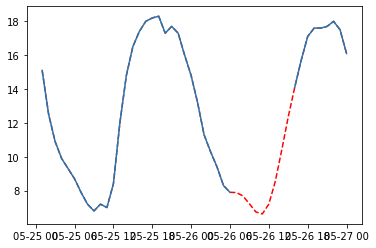

In [78]:
test3=test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 
test4=test[(test['time']>='2022-05-25 01:00:00') & (test['time']<'2022-05-27 01:00:00')] 
x=test3['time']
y=test3['temp']
y2=test4['temp']

plt.plot(x,y, 'r--',x,y2)
#plt.plot(x,y2)
plt.show()

In [39]:
#testing spline, actually I don't like it - the numbers are too smooth.  

#test2=dfint2[dfint2['station']=='0CNUO']
#for column in test2:
#    if column in ['station', 'time']:
#        None
#    else:
        #print(column)
#        test2[column]=test2[column].interpolate(method='spline', order=3)

In [40]:
#test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 

In [79]:
dfint.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,pres
count,3656487.000,3656472.000,3656492.000,3636572.000,3656459.000,3656467.000,3656468.000
mean,8.963,3.375,71.109,0.117,183.748,13.749,1015.761
std,13.882,13.159,18.682,1.066,112.148,9.399,7.998
min,-43.000,-52.900,0.000,0.000,0.000,0.000,970.300
25%,-1.000,-6.000,58.000,0.000,90.000,7.600,1011.000
50%,12.000,5.900,73.000,0.000,190.000,13.000,1015.900
75%,20.000,14.600,86.000,0.000,280.000,18.400,1020.400
max,60.000,60.000,100.000,332.000,360.000,189.000,1058.700


In [80]:
dfint.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,pres
count,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000
mean,8.963,3.375,71.110,0.054,183.752,13.750,1015.760
std,13.881,13.159,18.685,302.141,112.151,9.399,7.998
min,-43.000,-52.900,-144.058,-39629.848,-354.137,-24.899,970.300
25%,-1.000,-6.000,58.000,0.000,90.000,7.600,1011.000
50%,12.000,5.900,73.000,0.000,190.000,13.000,1015.900
75%,20.000,14.500,86.000,0.000,280.000,18.400,1020.400
max,60.000,60.000,155.868,36710.552,743.424,189.000,1058.700
